## Experiment reporter
* Tool for analysing the experiment results, stored in loggers


In [ ]:
import pickle
from detector.reporter import Reporter

with open('drift/logs_cesnet_miners22_Nettisa-evaluation-retrained.pkl', 'rb') as inp:
    logger_retrained = pickle.load(inp)
with open('drif/tlogs_cesnet_miners22_Nettisa-evaluation.pkl', 'rb') as inp:
    logger_reference = pickle.load(inp)

reporter_retrained = Reporter(logger_retrained, ["Retraining Model"], chunk_length=7)
reporter_reference = Reporter(logger_reference, ["Reference Model"], chunk_length=7)

### Global overview of the experiment results
Show how the experiments were defined and get the broad overview of experiment results

In [14]:
reporter_retrained.print_experiment_overview()
reporter_reference.print_experiment_overview()

1 experiments were performed, each with 101 rounds of detection,
Experiment was generated based on fixed samples window


drift_detection_count  drift_strength_mean  \
experiment                                                     
Retraining Model                      0             0.014014   

                  drift_strength_std  share_drifted_features_mean  \
experiment                                                          
Retraining Model            0.003389                          0.0   

                  share_drifted_features_std   f1_mean    f1_std  
experiment                                                        
Retraining Model                         0.0  0.998128  0.000462


The experiments and their tests were defined as follows:
Experiment 0: Retraining Model
Baseline
Global test info:
Wasserstein test compares the normalised Wasserstein distance between historical and current distribution.
A feature is concidered drifted when the distance is higher than 0.1.
The whole sample is concidered drifted when the weighed mean of all test results is higher than 0.04.

Class test info:
KS test uses the two-sample kolmogorov-smirnov test to decide whether the historical and current distributions differ. 
A feature is concidered drifted when p-value is lower than 0.05.
The whole sample is concidered drifted when the weighed mean of all test results is lower than 0.475.

Logger is present

1 experiments were performed, each with 101 rounds of detection,
Experiment was generated based on fixed samples window


drift_detection_count  drift_strength_mean  \
experiment                                                    
Reference Model                      0             0.014014   

                 drift_strength_std  share_drifted_features_mean  \
experiment                                                         
Reference Model            0.003389                          0.0   

                 share_drifted_features_std   f1_mean    f1_std  
experiment                                                       
Reference Model                         0.0  0.998128  0.000462


The experiments and their tests were defined as follows:
Experiment 0: Reference Model
Baseline
Global test info:
Wasserstein test compares the normalised Wasserstein distance between historical and current distribution.
A feature is concidered drifted when the distance is higher than 0.1.
The whole sample is concidered drifted when the weighed mean of all test results is higher than 0.04.

Class test info:
KS test uses the two-sample kolmogorov-smirnov test to decide whether the historical and current distributions differ. 
A feature is concidered drifted when p-value is lower than 0.05.
The whole sample is concidered drifted when the weighed mean of all test results is lower than 0.475.

Logger is present



 * Plotting global results leads to the first overview of differences between the experiments
    * The style of this graph cen be user defined

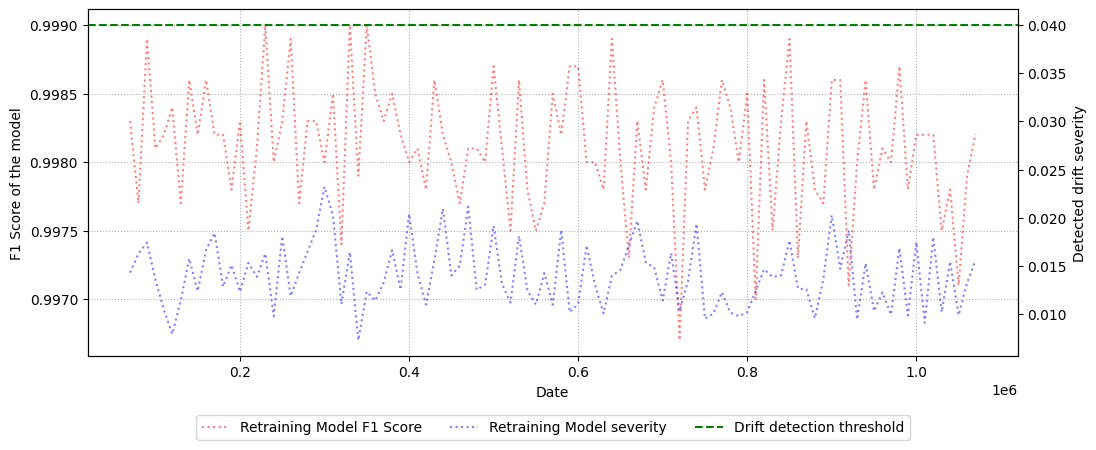

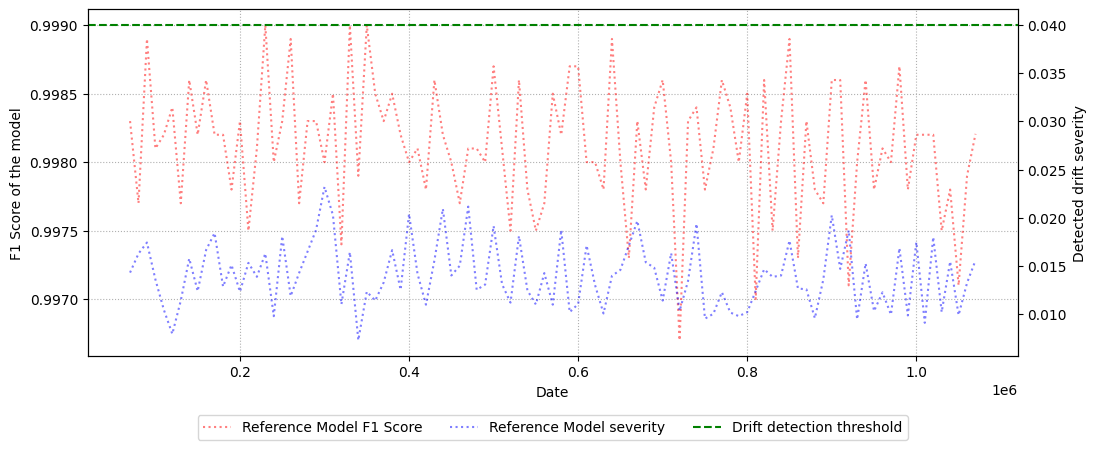

In [15]:
figure = reporter_retrained.plot_global_results(detection_threshold = 0.04,
        severity_style = [{"line": "dotted", "color": "blue", "alpha": 0.5},
                          {"line": "solid", "color": "blue", "alpha": 0.5}],
        f1_style = [{"line": "dotted", "color": "red", "alpha": 0.5},
                    {"line": "solid", "color": "red", "alpha": 0.5}],
        detection_style = [{"line": "solid", "color": "black", "alpha": 0.5},
                           {"line": "dotted", "color": "cyan", "alpha": 0.4}]
    )

figure = reporter_reference.plot_global_results(detection_threshold = 0.04,
        severity_style = [{"line": "dotted", "color": "blue", "alpha": 0.5},
                          {"line": "solid", "color": "blue", "alpha": 0.5}],
        f1_style = [{"line": "dotted", "color": "red", "alpha": 0.5},
                    {"line": "solid", "color": "red", "alpha": 0.5}],
        detection_style = [{"line": "solid", "color": "black", "alpha": 0.5},
                           {"line": "dotted", "color": "cyan", "alpha": 0.4}]
    )

### Chunk by chunk analysis
One may split the results into chunks (for example weeks) to quickly discover interesting parts of the data to further study

In [16]:
for r in reporter_retrained.get_chunk_results(sort_by="Mean_drift_strength", ascending = False):
    display(r)

for r in reporter_reference.get_chunk_results(sort_by="Mean_drift_strength", ascending = False):
    display(r)

Ratio_of_drift_detections  Mean_drift_strength  \
Chunk                                                   
3                            0.0             0.016182   
5                            0.0             0.015719   
8                            0.0             0.015063   
1                            0.0             0.014760   
4                            0.0             0.014371   
11                           0.0             0.014301   
2                            0.0             0.014186   
6                            0.0             0.013985   
13                           0.0             0.013818   
7                            0.0             0.013595   
0                            0.0             0.013027   
12                           0.0             0.012917   
9                            0.0             0.012891   
14                           0.0             0.012878   
10                           0.0             0.011876   

       Mean_ratio_of_drifted_features  Mean_f1_score  
Chunk                                                 
3                                 0.0       0.998200  
5                                 0.0       0.998071  
8                                 0.0       0.998071  
1                                 0.0       0.998271  
4                                 0.0       0.998371  
11                                0.0       0.998128  
2                                 0.0       0.998214  
6                                 0.0       0.998028  
13                                0.0       0.998057  
7                                 0.0       0.998257  
0                                 0.0       0.998185  
12                                0.0       0.998028  
9                                 0.0       0.997985  
14                                0.0       0.997735  
10                                0.0       0.998086

Ratio_of_drift_detections  Mean_drift_strength  \
Chunk                                                   
3                            0.0             0.016182   
5                            0.0             0.015719   
8                            0.0             0.015063   
1                            0.0             0.014760   
4                            0.0             0.014371   
11                           0.0             0.014301   
2                            0.0             0.014186   
6                            0.0             0.013985   
13                           0.0             0.013818   
7                            0.0             0.013595   
0                            0.0             0.013027   
12                           0.0             0.012917   
9                            0.0             0.012891   
14                           0.0             0.012878   
10                           0.0             0.011876   

       Mean_ratio_of_drifted_features  Mean_f1_score  
Chunk                                                 
3                                 0.0       0.998200  
5                                 0.0       0.998071  
8                                 0.0       0.998071  
1                                 0.0       0.998271  
4                                 0.0       0.998371  
11                                0.0       0.998128  
2                                 0.0       0.998214  
6                                 0.0       0.998028  
13                                0.0       0.998057  
7                                 0.0       0.998257  
0                                 0.0       0.998185  
12                                0.0       0.998028  
9                                 0.0       0.997985  
14                                0.0       0.997735  
10                                0.0       0.998086

### Per class analysis
Analyse different classes and find potentially problematic ones. Automatic plotting of the most drifted classes can be done, or various manual plotting functions can be used to further examine interesting behaviour

* Here, we can look at the most drifted classes, then analyse the most correlated ones or examine the model retraining effects on the most drifted class

Most drifted classes:

Experiment Retraining Model
0    0.557179
1    0.562672
dtype: float64

 Compare F1 scores between experiments:


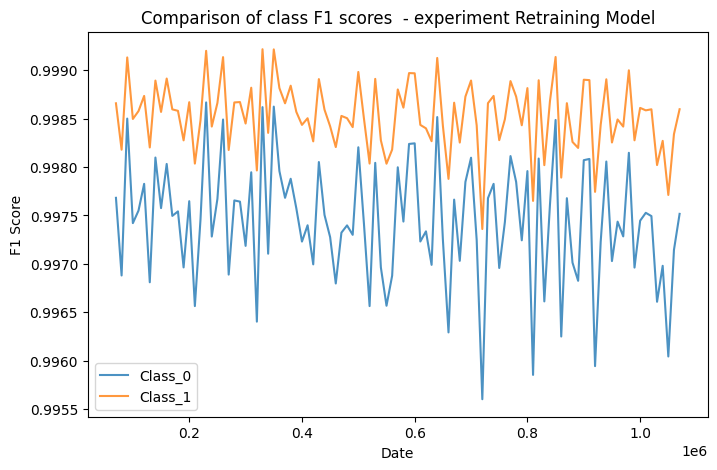

Compare drifts between experiments:


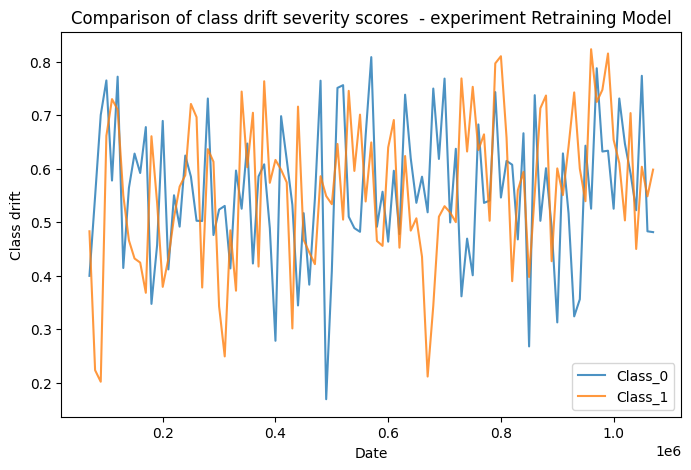

Class pairs with most correlated F1 scores
0  1    0.995865
dtype: float64

Class pairs with most correlated drifts
0  1    0.003372
dtype: float64
Most drifted classes:

Experiment Reference Model
0    0.557179
1    0.562672
dtype: float64

 Compare F1 scores between experiments:


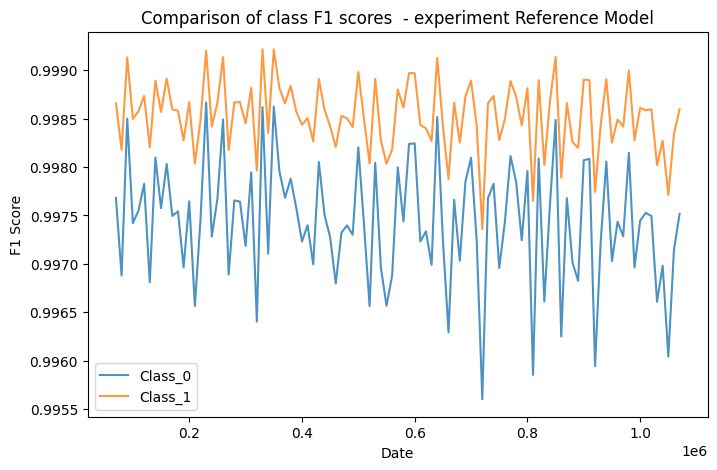

Compare drifts between experiments:


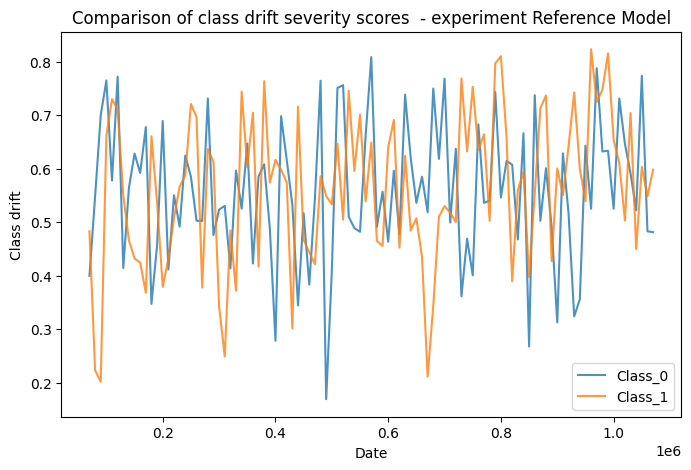

Class pairs with most correlated F1 scores
0  1    0.995865
dtype: float64

Class pairs with most correlated drifts
0  1    0.003372
dtype: float64


In [17]:
reporter_retrained.analyse_class_drift(5)

reporter_reference.analyse_class_drift(5)

In [16]:
#Example of multifeature support
#reporter_ref.plot_class("class_f1",[56,59,55])
#reporter_ref.plot_class("class_drift",[39,72])
#reporter_ref.plot_class_comparison([9,10])

### Per feature analysis
Analyse different features and find potentially problematic ones. 

Most drifted features:

Experiment Retraining Model
nts_mean_time_differences    0.017479
nts_mean_relative_time       0.015617
nts_directions               0.015475
nts_max_time_differences     0.015200
nts_mean                     0.013701
dtype: float64

 Compare drifts between experiments:


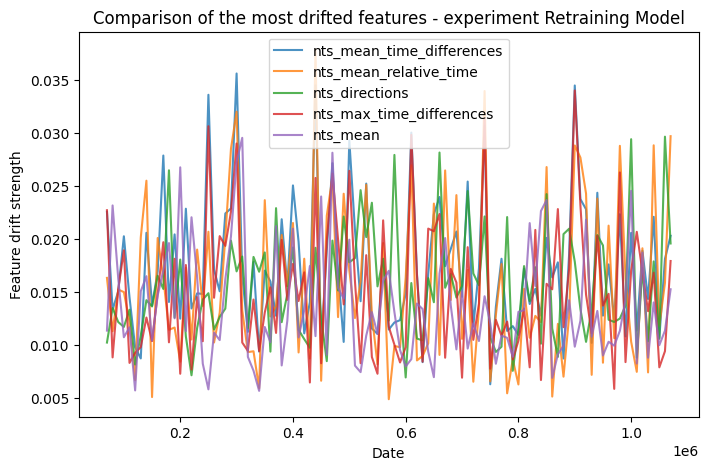

Most drifted features:

Experiment Reference Model
nts_mean_time_differences    0.017479
nts_mean_relative_time       0.015617
nts_directions               0.015475
nts_max_time_differences     0.015200
nts_mean                     0.013701
dtype: float64

 Compare drifts between experiments:


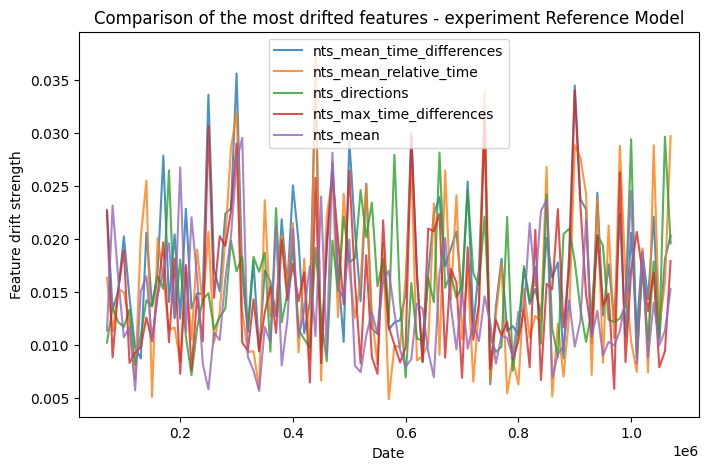

In [18]:
reporter_retrained.analyse_feature_drift(5)

reporter_reference.analyse_feature_drift(5)

In [66]:
#reporter.plot_feature_comparison("SIZE_4")

In [22]:
#Example of multifeature support
#reporter.plot_feature(["SIZE_5","DIR_3"])

# Detailed logs

In [19]:
detailed_logs_retrained = logger_retrained[0].get_logs()

detailed_logs_reference = logger_reference[0].get_logs()

In [19]:
#display(detailed_logs["description"])
#display(detailed_logs["overview"])
#display(detailed_logs["test_info"])
#detailed_logs["global_drift"]
#detailed_logs["class_drift"]
#detailed_logs["class_shares"]
#detailed_logs["class_f1"]
#detailed_logs["feature_drift"]

In [20]:
detailed_logs_retrained["global_drift"][detailed_logs_retrained["global_drift"]["is_drifted"] == True ]

Empty DataFrame
Columns: [is_drifted, drift_strength, share_drifted_features, f1]
Index: []

In [22]:
detailed_logs_reference["global_drift"][detailed_logs_reference["global_drift"]["is_drifted"] == False ]

is_drifted  drift_strength  share_drifted_features        f1
70000         False        0.014281                     0.0  0.998300
80000         False        0.016257                     0.0  0.997700
90000         False        0.017409                     0.0  0.998900
100000        False        0.013561                     0.0  0.998100
110000        False        0.010409                     0.0  0.998199
...             ...             ...                     ...       ...
1030000       False        0.010167                     0.0  0.997499
1040000       False        0.015429                     0.0  0.997799
1050000       False        0.009864                     0.0  0.997100
1060000       False        0.013210                     0.0  0.997900
1070000       False        0.015559                     0.0  0.998206

[101 rows x 4 columns]